# Nate's Notebook
This notebook contains exploratory analysis of IMDB's database (im.zip).

## Data preparation:
In order to run this notebook, you will need to download the necessary data file.  A zipped version of the file can be downloaded: [here](https://github.com/fetterollie/Microsoft-Movie-Analysis/raw/main/zippedData/im.db.zip).

Download the zipped file into a folder called 'zippedData' within the same folder that this notebook is located.  Once this zip file is in located in the zippedData folder, you can run the following cell to unzip it.

In [6]:
import zipfile
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

Run the following cell to confirm that the database file has been downloaded and unzipped to the correct folder:

In [10]:
from os.path import exists
file_exists = exists('zippedData\im.db')
if file_exists:
    print("You have successfully downloaded and unzipped the database file.  Please proceed.")
else:
    print("The database file was not found.  Please ensure that the database file has been downloaded and unzipped into the 'zippedData' folder located in the folder that this Jupyter notebook resides.")

You have successfully downloaded and unzipped the database file.  Please proceed.


First, we want to open up the database and examine the database tables.

In [3]:
import pandas as pd
import sqlite3
con = sqlite3.connect('zippedData/im.db')
query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(query, con)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


 The tables of initial interest at first glance are the following: movie_basics and movie_ratings.  

### Examine movie_basics table

In [4]:
query = """  SELECT * FROM movie_basics  """
movie_basics = pd.read_sql(query, con)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


**Notes on movie_basics table:**
- This table has the ~146K movie records.
- It has a a movie_id, primary_title, and start_year for all records.
- It has genres for most records (~141K)
- It has run-time minutes for only ~114K records.  Since this is more than 10% missing, we may not want to rely on this column.
- The primary key is the movie_id, which is referenced in other tables.

### Examine movie_ratings table

In [12]:
query = """  SELECT * FROM movie_ratings  """
movie_ratings = pd.read_sql(query, con)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


**Notes on movie_ratings table:**
- Movie ratings are only given for ~74K of the ~146K movies.  Since movie ratings seem to be the most relevant numerical value from the database file, we will base on our analysis on only movies that have a rating.  This reduces the number of movies in our analysis to ~74K. 

### Examine other tables
The other tables appear to refer to less relevant information to our current analysis.  The following opens up each table and reviews the general contents of each:

Examine Movie Writers table

In [19]:
query = """  SELECT * FROM writers  """
writers = pd.read_sql(query, con)
writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [20]:
writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


Examine Movie Directors table

In [21]:
query = """  SELECT * FROM directors  """
directors = pd.read_sql(query, con)
directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [22]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


Examine Movie known_for table

In [23]:
query = """  SELECT * FROM known_for  """
known_for = pd.read_sql(query, con)
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


Examine Movie AKAS table


In [24]:
query = """  SELECT * FROM movie_akas  """
movie_akas = pd.read_sql(query, con)
movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [25]:
query = """  SELECT * FROM directors  """
movie_akas = pd.read_sql(query, con)
movie_akas.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


Examine Movie Persons table

In [26]:
query = """  SELECT * FROM persons  """
persons = pd.read_sql(query, con)
persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


Examine known_for table

In [27]:
query = """  SELECT * FROM known_for  """
known_for = pd.read_sql(query, con)
known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


### Merge movie_ratings with movie_basics
Now that we've examined the data available in the database, we want to combine some of the data so that we can ultimately analyze it.  

The first step is to merge the movie_ratings table with the movie_basics table.  As noted previously, we only want to look at movies with ratings because the ratings are the most useful numeric information regarding viewer preferences.  As such, we start with the reviews table and pull in the related movie_basics table information. This results in a dataset with ~74K movies.

In [28]:
movies_with_ratings = pd.merge(movie_ratings, movie_basics, left_on='movie_id', right_on='movie_id')
movies_with_ratings

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [29]:
movies_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


**Drop the movies with an insufficient number of votes**

We want to consider the number of votes in our results, as the fewer number of votes a movie rating has will lead to less certainty in the average rating.  As such, we decided to cut the analysis to the top half (all movies over the median number of votes, which is 49).    

In [137]:
# Find the median number of votes in the remaining data set
median_votes = movies_with_ratings['numvotes'].median()
median_votes

49.0

In [136]:
# Drop movies with number of votes less than the median
movies_with_ratings_over_median_votes = movies_with_ratings.loc[movies_with_ratings['numvotes']>median_votes]
movies_with_ratings_over_median_votes

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
5,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
6,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
7,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"
...,...,...,...,...,...,...,...,...
73831,tt9558612,3.7,4057,PM Narendra Modi,PM Narendra Modi,2019,136.0,"Biography,Drama"
73832,tt9575726,7.7,161,Ir visi ju vyrai,Ir visi ju vyrai,2019,108.0,"Comedy,Romance"
73833,tt9576110,6.8,65,J'veux du soleil,J'veux du soleil,2019,76.0,Documentary
73844,tt9668598,5.5,317,Musabbar,Musabbar,2019,NaN,"Horror,Thriller"


We now have a dataset of ~37K movies that all have a sufficient number of votes for us to be confident in the average ratings. We can now analyze the dataset.

# Data analysis

## Runtime minute analysis

We want to determine if there is a viewer preference between the number of runtime minutes for a movie and the average rating viewers give it.  As you can see from the cell below, we still have some movies that do not have runtime_minutes.  As such, we will drop those records.  

In [138]:
movies_with_ratings_over_median_votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36824 entries, 1 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         36824 non-null  object 
 1   averagerating    36824 non-null  float64
 2   numvotes         36824 non-null  int64  
 3   primary_title    36824 non-null  object 
 4   original_title   36824 non-null  object 
 5   start_year       36824 non-null  int64  
 6   runtime_minutes  35367 non-null  float64
 7   genres           36751 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.5+ MB


**Drop the movies with no runtime minutes**

In [139]:
# Drop movies with runtime_minutes of n/a
movies_with_ratings_over_median_votes_dropna = movies_with_ratings_over_median_votes.dropna(subset=['runtime_minutes'])
movies_with_ratings_over_median_votes_dropna

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
5,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
6,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
7,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"
...,...,...,...,...,...,...,...,...
73828,tt9471952,7.1,338,Sükut Evi,Sükut Evi,2018,97.0,Drama
73831,tt9558612,3.7,4057,PM Narendra Modi,PM Narendra Modi,2019,136.0,"Biography,Drama"
73832,tt9575726,7.7,161,Ir visi ju vyrai,Ir visi ju vyrai,2019,108.0,"Comedy,Romance"
73833,tt9576110,6.8,65,J'veux du soleil,J'veux du soleil,2019,76.0,Documentary


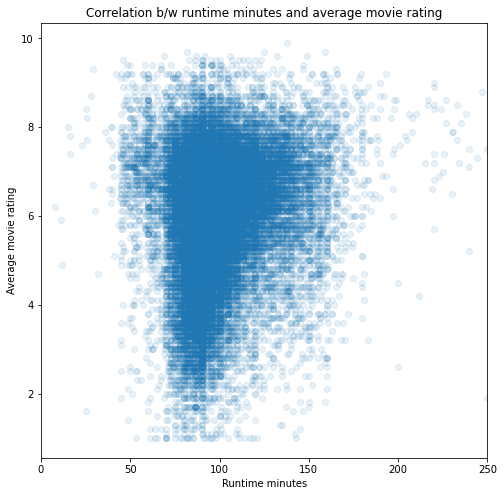

In [142]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.scatter(movies_with_ratings_over_median_votes_dropna['runtime_minutes'], movies_with_ratings_over_median_votes_dropna['averagerating'], alpha=.1)
ax.set_xlim(0, 250);
ax.set_title("Correlation b/w runtime minutes and average movie rating")
ax.set_xlabel("Runtime minutes")
ax.set_ylabel("Average movie rating")
None;

### Conclusion of runtime minute analysis: 
- The highest rated movies represented by the highest/darkest area in the above scatter plot are between the 90-100 minute range.  This would indicate a user preference for movies around 1 hour and 30 minutes to 1 hour and 40 minutes.  Therefore, we would recommend making movies with this length. 